In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
from scipy.interpolate import griddata

In [81]:
#Подгрузка вытянутых данных по льду за одни сутки
SIC = pd.read_csv('noname.csv',
           sep = ',',
           header = 0)
SIC = SIC[['lon','lat','sic']]

In [107]:
#Разделение данных по долготам и широтам
x = (SIC['lon'])
y = (SIC['lat'])

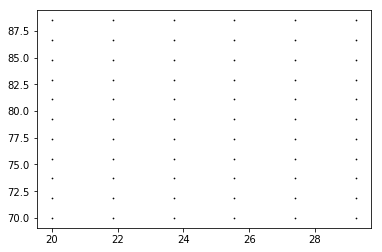

In [149]:
#Создание модельной сетки
def grid(x_min, x_max, y_min, y_max, x_step, y_step):
    xi = np.arange(x_min, x_max, x_step)
    yi = np.arange(y_min, y_max, y_step)
    xx, yy = np.meshgrid(xi, yi)
    
    return xi, yi, xx, yy

xi, yi, xx, yy = grid(20, 30, 70, 90,1.85, 1.85)
plt.scatter(xx, yy, marker = 'o', c = 'k', s = 0.5)

In [150]:
z = (SIC['sic'])

In [151]:
# Схема интерполяция данных с исходной сетки на модельную
griddata((x,y),
        z,
       (xx,yy))

array([[        nan,         nan,         nan,         nan,         nan,
                nan],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [78.24521842, 69.44754709, 69.18886774, 42.56140198,  9.22386366,
         3.05158581],
       [88.88230304,         nan,         nan, 94.98999035, 96.38272501,
        96.61317894],
       [        nan,         nan,         nan,         nan, 95.82892624,
        97.01237014],
       [99.40702462, 99.56107043, 99.62008881, 99.61405404, 99.48937082,
        98.95280597],
       [97.32032146, 97.26436755, 97.20028158, 97.08335695, 97.02361061,
        97.00780763],
       [97.66750249, 97.58099756, 97.4815882 , 97.42976123, 97.33112382,
        97.23931214],
       [98.46690552, 98.38948456, 98.31353461, 98.26493471, 98.17743598,
        98.13086084],
       [99.13481361, 99.10789205, 99.04718414, 98.

In [152]:
# Линейная интерполяция
zi = griddata((SIC['lon'].values, SIC['lat'].values),
                  SIC['sic'].values,
                  (xx, yy),
                  method='linear')

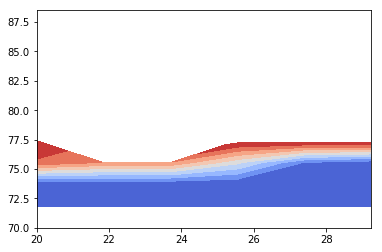

In [153]:
levels = np.arange(0,
                  100,
                  10)
plt.contourf(xx,
            yy,
            zi,
            levels,
            cmap=plt.get_cmap('coolwarm'))

In [154]:
zi
new_x = xx[0,:]
new_y = yy[:,0]
zi

array([[        nan,         nan,         nan,         nan,         nan,
                nan],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [78.24521842, 69.44754709, 69.18886774, 42.56140198,  9.22386366,
         3.05158581],
       [88.88230304,         nan,         nan, 94.98999035, 96.38272501,
        96.61317894],
       [        nan,         nan,         nan,         nan, 95.82892624,
        97.01237014],
       [99.40702462, 99.56107043, 99.62008881, 99.61405404, 99.48937082,
        98.95280597],
       [97.32032146, 97.26436755, 97.20028158, 97.08335695, 97.02361061,
        97.00780763],
       [97.66750249, 97.58099756, 97.4815882 , 97.42976123, 97.33112382,
        97.23931214],
       [98.46690552, 98.38948456, 98.31353461, 98.26493471, 98.17743598,
        98.13086084],
       [99.13481361, 99.10789205, 99.04718414, 98.

In [156]:
lat =[]
lon=[]
for j in range(len(new_x)):
    for k in range(len(new_y)):
        lat.append(new_x[j])
        lon.append(new_y[k])
cords = np.column_stack((lat, lon))
array_out = np.column_stack((cords, zi.flatten()))
np.shape(array_out)
array_out

array([[20.        , 70.        ,         nan],
       [20.        , 71.85      ,         nan],
       [20.        , 73.7       ,         nan],
       [20.        , 75.55      ,         nan],
       [20.        , 77.4       ,         nan],
       [20.        , 79.25      ,         nan],
       [20.        , 81.1       ,  0.        ],
       [20.        , 82.95      ,  0.        ],
       [20.        , 84.8       ,  0.        ],
       [20.        , 86.65      ,  0.        ],
       [20.        , 88.5       ,  0.        ],
       [21.85      , 70.        ,  0.        ],
       [21.85      , 71.85      ,  0.        ],
       [21.85      , 73.7       ,  0.        ],
       [21.85      , 75.55      ,  0.        ],
       [21.85      , 77.4       ,  0.        ],
       [21.85      , 79.25      ,  0.        ],
       [21.85      , 81.1       ,  0.        ],
       [21.85      , 82.95      , 78.24521842],
       [21.85      , 84.8       , 69.44754709],
       [21.85      , 86.65      , 69.188

In [147]:
# make them a meshgrid for later use KDTree
#new_x2d, new_y2d = np.meshgrid(new_y, new_x)
#np.shape(new_x2d)
# zip them together
#model_grid = list( zip(np.ravel(new_y2d), np.ravel(new_x2d)) ) 
#df = pd.DataFrame({'new_y': lat.ravel(), 'new_x': lon.ravel(), 'zi.flatten': val.ravel()})

In [162]:
# reshape 1D array
%from numpy import array
#array_out = array_out.reshape((array_out.shape[0], 1))
#print(array_out.shape)
array_out([new_x[1],new_y[1],zi[1)])

TypeError: 'numpy.ndarray' object is not callable